# Medipredict

Eerst importeren de we de libraries dat we nodig hebben.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import io

## Dataset verkennen

We laden eerst onze dataset.

In [3]:
df= pd.read_csv("data/diabetes_general_information_dataset.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


Onze dataset bestaat uit de volgende metadata:

- Diabetes_012: Drie categorieën die de diabetesstatus aanduiden: 0 voor geen diabetes, 1 voor pre-diabetes, en 2 voor diabetes.

- HighBP: Geeft aan of de patiënt hoge bloeddruk heeft (1) of niet (0).

- HighChol: Geeft aan of de patiënt een hoog cholesterolgehalte heeft (1) of niet (0).

- CholCheck: Geeft aan of de patiënt in de afgelopen 5 jaar een cholesterolcontrole heeft gehad (1) of niet (0).

- BMI: Body Mass Index, een maatstaf voor het lichaamsgewicht in relatie tot de lengte.

- Smoker: Geeft aan of de persoon meer dan 100 sigaretten in zijn leven heeft gerookt (1) of niet (0).

- Stroke: Geeft aan of de persoon ooit een hartaanval heeft gehad (1) of niet (0).

- HeartDiseaseorAttack: Geeft aan of de persoon coronaire hartziekte of een myocardinfarct heeft gehad (1) of niet (0).

- PhysActivity: Geeft aan of de persoon in de afgelopen 30 dagen heeft gesport (1) of niet (0).

- Fruits: Geeft aan of de persoon meer dan één stuk fruit per dag eet (1) of niet (0).

- Veggies: Geeft aan of de persoon meer dan één stuk groente per dag eet (1) of niet (0).

- HeavyAlcoholConsumption: Geeft aan of de persoon meer dan een bepaalde hoeveelheid alcohol per week consumeert, afhankelijk van het geslacht.

- AnyHealthcare: Geeft aan of de persoon een zorgverzekering heeft (1) of niet (0).

- NoDocbcCost: Geeft aan of de persoon in het afgelopen jaar naar de dokter moest gaan maar dit heeft vermeden vanwege de kosten (1) of niet (0).

- GenHlth: Laat de persoon zijn/haar algemene gezondheid beoordelen op een schaal van 1 tot 5.

- MentHlth: Geeft aan of de persoon problemen heeft met de mentale gezondheid en zo ja, hoeveel dagen in de afgelopen 30 dagen.

- PhysHlth: Geeft aan of de persoon problemen heeft met de fysieke gezondheid en zo ja, hoeveel dagen in de afgelopen 30 dagen.

- DiffWalk: Geeft aan of de persoon moeite heeft met lopen/traplopen (1) of niet (0).

- Sex: Geslacht van de persoon, waar 0 staat voor vrouw en 1 voor man.

- Age: Leeftijd van de persoon.

- Education: Opleidingsniveau, op een schaal van 1 tot 6.

- Income: Inkomen, op basis van verschillende inkomensniveaus.








Nadat we onze dataset hebben opgeladen, kunnen we df.info() gebruiken om de datatypes en aantal non-null values van onze dataset te zien. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

Nadat we onze dataset hebben geladen en bekeken, zien we dat deze compleet is, Want het aantal non-null waarden gelijk is voor alle kolommen. Maar we zien ook dat de dataset niet schoon is. Met behulp van df.info() zien we dat sommige kolommen float-datatypes bevatten.

De enige kolommen die daadwerkelijk float-datatypes moeten hebben, zijn de kolommen BMI en Age (Leeftijd), omdat deze numerieke waarden representeren. Daarom hoeven de datatypes van deze kolommen niet worden gewijzigd. De overige kolommen bevatten categorieën en hebben float-datatypes (decimale getallen). Als we deze kolommen willen gebruiken in een classificatiealgoritme, moeten we onze dataset moeten schoonmaken. Dit betekent dat we de datatypes van floats naar integers moeten wijzigen.

Hiervoor hebben we de volgende code nodig:

In [5]:
df[['Diabetes_012', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']] = df[['Diabetes_012', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']].astype(int)
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15.0,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,2,1,0,1,28.0,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,2,1,1,1,33.0,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,2,0,1,1,29.0,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24.0,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6


M.b.v df.info() kunnen we zien dat we de datatypes van de kolommen succesvol hebben veranderd. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  int64  
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  int64  
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  int64  
 6   Stroke                236378 non-null  int64  
 7   HeartDiseaseorAttack  236378 non-null  int64  
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  int64  
 14  GenHlth               236378 non-null  int64  
 15  

Nadat we onze dataset hebben schoongemaakt, kunnen we verschillende statistieken berekenen. Deze berekeningen zijn heel belangrijk om te bepalen welke data/variabelen belangrijk zijn voor het trainen van ona algoritme.

## Statistieken

M.b.v van df.describe() kunnen we verschillende statistiek berekenigen (Zoals: Gemiddelde, Standaardderivatie, Min, Max, enz) bij alle kolommen van onze dataset uitvoeren.

In [7]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


### Outliers:


Outliers zijn getallen die vallen buiten 95%-betrouwbaarheidsinterval in een dataset. Outliers kunnen de resultaten van onze analyse of voorspellingen van AI-Model verstoren. Stel je voor dat je de gemiddelde lengte van mensen in een kamer berekent. Als een man van 2 meter ook in die kamer is, zal zijn lengte het gemiddelde flink verhogen, waardoor het niet representatief is voor de populatie in de kamer.

Door de outliers te verwijderen, zorgen we dat onze dataset juist representatie voor de populatie is en ook zorgen we voor een beter beeld van onze resultaten. Hierdoor kunnen we de conclusies en voorspellingen betrouwbaarder maken.

De enige variabelen dat we moeten onderzoeken zijn: 'BMI', 'Age, 'PhysHlth' en 'MentHlth'. Want deze variabelen representeren juist numerieke waardes. Hierdoor hebben de volgende code gebruikt om boxplotten voor deze variabelen te genereren.

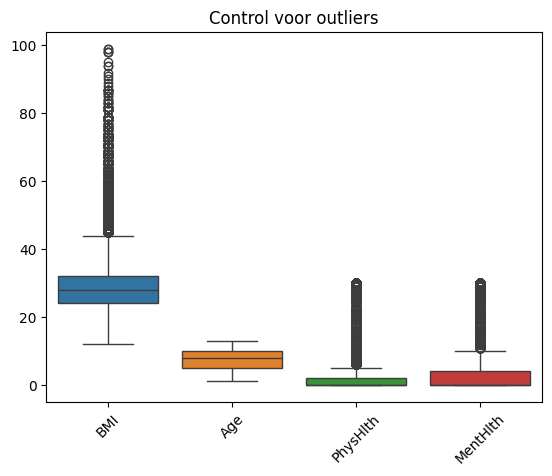

In [8]:
sns.boxplot(data=df[['BMI', 'Age', 'PhysHlth', 'MentHlth']])
plt.xticks(rotation=45)
plt.title('Control voor outliers')
plt.show()

Nadat we de boxplotten hebben gegenereerd, kunnen we zien dat de variabelen 'BMI', 'PhysHlth' en 'MentHlth' bevatten veel outliers. Om een betere beeld van deze outliers te krijgen, zullen we inzoomen in deze variabelen:

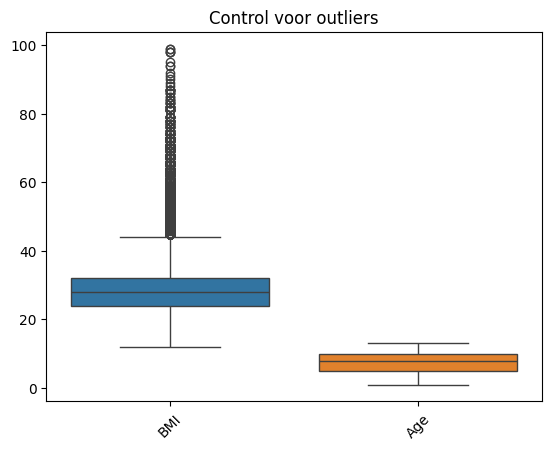

In [9]:
sns.boxplot(data=df[['BMI', 'Age']])
plt.xticks(rotation=45)
plt.title('Control voor outliers')
plt.show()

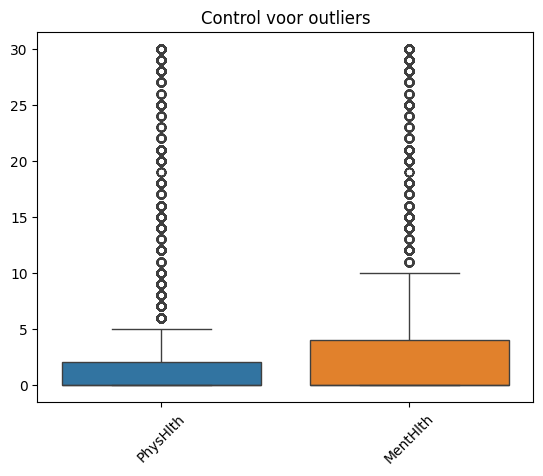

In [10]:
sns.boxplot(data=df[['PhysHlth', 'MentHlth']])
plt.xticks(rotation=45)
plt.title('Control voor outliers')
plt.show()


Nadat we hebben ingezoomd op de variabelen, kunnen we zien dat:

- De meeste outliers van de variabele 'BMI' een waarde boven de 43 hebben. Deze outliers zijn veroorzaakt door fouten tijdens het invoeren van deze waardes, aangezien de maximale BMI-waarde 40 is. Een BMI hoger dan 40 betekent niet automatisch een slechtere Body Mass Index dan iemand met een BMI van 40. Daarom hebben we gekozen om alle rijen te verwijderen die personen met een BMI hoger dan 43 bevatten.

- De meeste outliers van de variabelen 'PhysHlth' en 'MentHlth' hebben waardes boven respectievelijk 6 (voor PhysHlth) en 11 (voor MentHlth). Deze outliers worden veroorzaakt omdat de meeste mensen gemiddeld 0 tot 3 dagen problemen hebben met hun fysieke gezondheid en gemiddeld 0 tot 4 dagen problemen hebben met hun mentale gezondheid. Dus mensen die meer dagen problemen hebben met hun fysieke en mentale gezondheid worden als outliers gezien. Daarom hebben we gekozen om alle rijen te verwijderen die personen bevatten met waardes boven respectievelijk 6 (voor PhysHlth) en 11 (voor MentHlth).

Hiervoor hebben de volgende codes nodig:

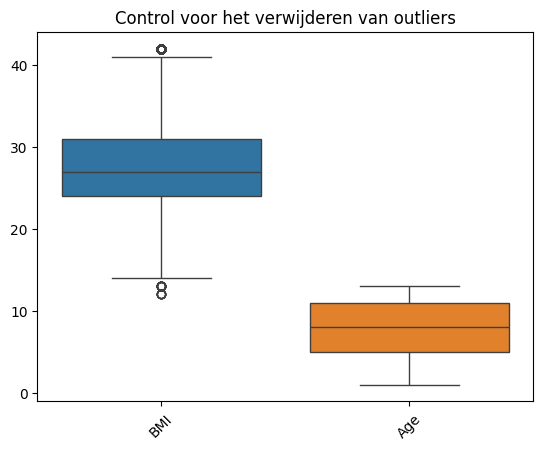

In [11]:
conditions = (df['BMI'] < 43) & (df['PhysHlth'] < 6) & (df['MentHlth'] < 11)
df_2 = df[conditions]
sns.boxplot(data=df_2[['BMI', 'Age']])
plt.xticks(rotation=45)
plt.title('Control voor het verwijderen van outliers')
plt.show()

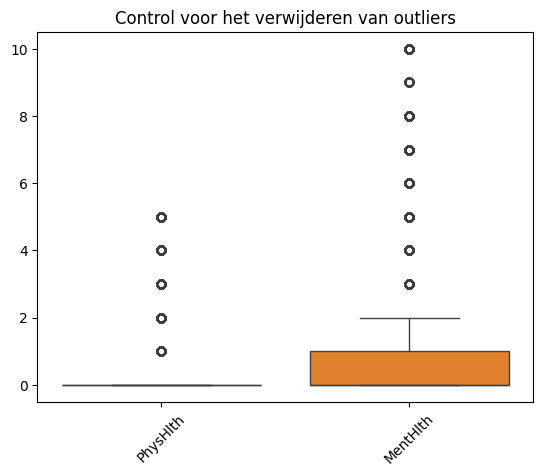

In [12]:
sns.boxplot(data=df_2[['PhysHlth', 'MentHlth']])
plt.xticks(rotation=45)
plt.title('Control voor het verwijderen van outliers')
plt.show()

Na het verwijderen van de respectieve waardes kunnen we zien dat de meeste outliers van de BMI variabele zijn verwijderd, en de overgebleven outliers zullen geen nadelige invloed hebben op onze dataset. Terwijl bij de variabelen 'PhysHlth' en 'MentHlth' hebben we nog meer outliers gevonden. Daarom hebben we besloten om deze variabelen uit onze dataset te verwijderen, aangezien ze te chaotisch lijken voor ons algoritme.

In [13]:
df_2 = df_2.drop(['PhysHlth', 'MentHlth'], axis=1)
print(df_2.head(5))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1             2       1         0          1  28.0       0       0   
2             2       1         1          1  33.0       0       0   
4             0       0         0          1  24.0       1       0   
7             2       0         0          1  24.0       0       0   
8             0       1         1          1  30.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
1                     1             0       1        0                  0   
2                     0             1       1        1                  0   
4                     0             0       0        0                  0   
7                     1             0       0        1                  0   
8                     0             0       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  DiffWalk  Sex  Age  Education  Income  
1              1            0       

### Correlaties:

Correlatie vertelt aan ons welke variabelen van onze dataset samen bewegen en in welke richting (Omhoog = Positief of Omlaag=Negatief). Dus, door correlaties te begrijpen, kunnen we patronen herkennen en beter voorspellen. Hierdoor kunnen we ook de belangrijkste variabelen  voor onze targetvariabel vinden.

In [14]:
correlatie = df_2.corr()
print(correlatie)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.248725  0.184038   0.067165  0.182314   
HighBP                    0.248725  1.000000  0.275191   0.099958  0.215701   
HighChol                  0.184038  0.275191  1.000000   0.100976  0.099331   
CholCheck                 0.067165  0.099958  0.100976   1.000000  0.036882   
BMI                       0.182314  0.215701  0.099331   0.036882  1.000000   
Smoker                    0.051736  0.096254  0.074937  -0.015102  0.025130   
Stroke                    0.076313  0.112315  0.072637   0.021728  0.007706   
HeartDiseaseorAttack      0.149599  0.183606  0.154224   0.040701  0.035201   
PhysActivity             -0.113697 -0.100611 -0.051965   0.003910 -0.120989   
Fruits                   -0.027479 -0.029285 -0.020113   0.026437 -0.093719   
Veggies                  -0.041920 -0.027768 -0.024146   0.019724 -0.044632   
HvyAlcoholConsump        -0.050747  0.002779 -0.0094

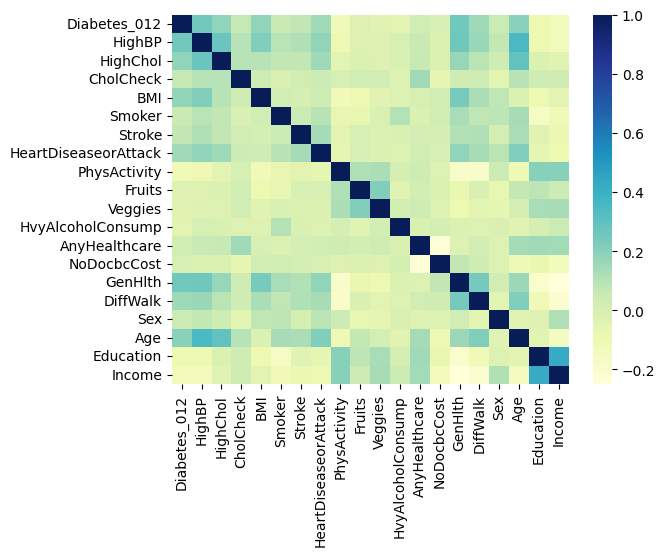

In [15]:
sns.heatmap(correlatie, xticklabels=correlatie.columns, yticklabels=correlatie.columns, cmap="YlGnBu")
plt.show()

Nadat we de correlaties van onze targetvariabel (Diabetes_012) hebben geanalyseerd, hebben gekozen om de volgende variabelen uit onze dataset te verwijderen: 'AnyHealthcare', 'NoDocbcCost', 'Education', 'Income'

In [16]:
df_3 = df_2.drop(['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income'], axis=1)
print(df_3.head(5))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1             2       1         0          1  28.0       0       0   
2             2       1         1          1  33.0       0       0   
4             0       0         0          1  24.0       1       0   
7             2       0         0          1  24.0       0       0   
8             0       1         1          1  30.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
1                     1             0       1        0                  0   
2                     0             1       1        1                  0   
4                     0             0       0        0                  0   
7                     1             0       0        1                  0   
8                     0             0       1        1                  0   

   GenHlth  DiffWalk  Sex  Age  
1        2         0    0   11  
2        2         0    0    9  
4        3       

In [17]:
correlatie_2 = df_3.corr()
print(correlatie_2)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.248725  0.184038   0.067165  0.182314   
HighBP                    0.248725  1.000000  0.275191   0.099958  0.215701   
HighChol                  0.184038  0.275191  1.000000   0.100976  0.099331   
CholCheck                 0.067165  0.099958  0.100976   1.000000  0.036882   
BMI                       0.182314  0.215701  0.099331   0.036882  1.000000   
Smoker                    0.051736  0.096254  0.074937  -0.015102  0.025130   
Stroke                    0.076313  0.112315  0.072637   0.021728  0.007706   
HeartDiseaseorAttack      0.149599  0.183606  0.154224   0.040701  0.035201   
PhysActivity             -0.113697 -0.100611 -0.051965   0.003910 -0.120989   
Fruits                   -0.027479 -0.029285 -0.020113   0.026437 -0.093719   
Veggies                  -0.041920 -0.027768 -0.024146   0.019724 -0.044632   
HvyAlcoholConsump        -0.050747  0.002779 -0.0094

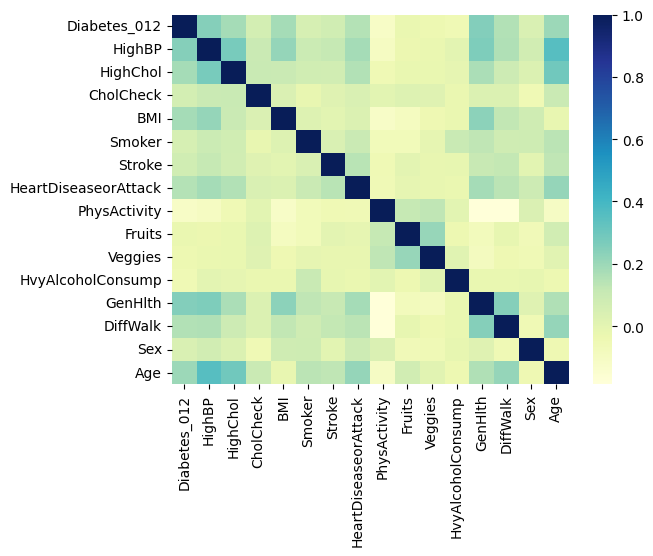

In [18]:
sns.heatmap(correlatie_2, xticklabels=correlatie_2.columns, yticklabels=correlatie_2.columns, cmap="YlGnBu")
plt.show()

### Data normaliseren:

Het normaliseren van een dataset is een cruciale stap bij het voorbereiden van gegevens voor machine learning-modellen, vooral als je met numerieke variabelen werkt. Normalisatie zorgt ervoor dat de gegevens vergelijkbaar zijn in termen van schaal, waardoor de prestaties van het model kunnen verbeteren. Je kan hiervoor verschillende methoden gebruiken zoals:

- Min-Max Normalisatie (Rescaling)
- Z-Score Normalisatie (Standardization)
- Robuuste Schaling (Robust Scaling)
- De formule die we gaan gebruiken is: (waarde - gemiddelde)/standaardvariabele.

In deze dataset hoeft alleen de variabelen 'BMI' en 'Age; genormaliseerd te worden

In [19]:
columns_normaliseren = ['BMI', 'Age']
for columns in columns_normaliseren:
  gemiddelde = df_3[columns].mean()
  std = df_3[columns].std()
  df_3[columns] = (df_3[columns] - gemiddelde) / std

print(df_3.head(5))

   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
1             2       1         0          1  0.008802       0       0   
2             2       1         1          1  0.993953       0       0   
4             0       0         0          1 -0.779318       1       0   
7             2       0         0          1 -0.779318       0       0   
8             0       1         1          1  0.402862       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
1                     1             0       1        0                  0   
2                     0             1       1        1                  0   
4                     0             0       0        0                  0   
7                     1             0       0        1                  0   
8                     0             0       1        1                  0   

   GenHlth  DiffWalk  Sex       Age  
1        2         0    0  0.950474  
2        2      

In [20]:
df_def = df_3
print(df_def.head())

   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
1             2       1         0          1  0.008802       0       0   
2             2       1         1          1  0.993953       0       0   
4             0       0         0          1 -0.779318       1       0   
7             2       0         0          1 -0.779318       0       0   
8             0       1         1          1  0.402862       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
1                     1             0       1        0                  0   
2                     0             1       1        1                  0   
4                     0             0       0        0                  0   
7                     1             0       0        1                  0   
8                     0             0       1        1                  0   

   GenHlth  DiffWalk  Sex       Age  
1        2         0    0  0.950474  
2        2      

## Dummificeren:

Het dummificeren van onze dataset helpt ons met het omzetten van categorische variabelen in een vorm die gemakkelijker door machine learning-modellen kan worden begrepen en verwerkt. Computers begrijpen getallen beter dan woorden of andere manier van informatie. Dus, om onze AI-model te helpen, veranderd we deze informatie in getallen.

In [21]:
df_def_dum = pd.get_dummies(df_def, columns=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex'])
df_def_dum.head(10)

,Diabetes_012,BMI,Age,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,...,HvyAlcoholConsump_1,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_0,DiffWalk_1,Sex_0,Sex_1
1,2,0.008802,0.950474,False,True,True,False,False,True,True,...,False,False,True,False,False,False,True,False,True,False
2,2,0.993953,0.331281,False,True,False,True,False,True,True,...,False,False,True,False,False,False,True,False,True,False
4,0,-0.779318,1.569666,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
7,2,-0.779318,1.260070,True,False,True,False,False,True,True,...,False,False,False,False,True,False,True,False,False,True
8,0,0.402862,-0.287912,False,True,False,True,False,True,True,...,False,False,True,False,False,False,True,False,True,False
9,0,1.585043,0.640877,False,True,False,True,False,True,False,...,False,False,False,False,True,False,True,False,False,True
10,2,0.993953,-0.597508,True,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,True
11,2,0.402862,0.950474,False,True,False,True,False,True,True,...,False,False,False,True,False,False,True,False,True,False
14,0,-0.188228,1.569666,False,True,False,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
15,0,1.388013,0.950474,False,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False


## Model maken en evalueren

### Classificatie AI-model

Classificatie is een techniek binnen machine learning en statistiek waarbij het doel is om gegevenspunten in verschillende categorieën of klassen te plaatsen op basis van hun kenmerken. Het is een vorm van supervisie, waarbij het algoritme wordt getraind op een gelabelde dataset waarin elk gegevenspunt is toegewezen aan een bepaalde klasse. Het doel van het getrainde model is om nieuwe, niet-gelabelde gegevenspunten correct te classificeren in een van de bekende klassen.

Bij classificatiealgoritmen wordt gebruikgemaakt van kenmerken (features) van de gegevenspunten om voorspellingen te doen over de klasse waartoe ze behoren. Enkele veelgebruikte classificatiealgoritmen zijn logistische regressie, beslissingsbomen, random forests, ondersteunende vectormachines (SVM) en neurale netwerken.

Classificatie wordt veel toegepast in verschillende domeinen, zoals spamdetectie in e-mails, medische diagnose, beeldherkenning, financiële fraude-detectie en vele andere toepassingen waarbij het noodzakelijk is om gegevens in verschillende categorieën in te delen.

## KNN Classifier

### Data splitten in een train en test set

- X = Features (onafhankelijke variabele)

Deze variabelen zijn de invoer of features die worden gebruikt om voorspellingen te doen, patronen te identificeren, of een relatie te modelleren. Ze worden gebruikt om het gedrag van de afhankelijke variabele te voorspellen.

- y = Doelvariabele (afhankelijke variabele)

Deze variabele is het resultaat of de uitkomst die we proberen te voorspellen of te begrijpen op basis van de onafhankelijke variabelen. Het is het antwoord of de reactie op de veranderingen in de X-variabelen.

- test_size = het percentage gegevens wat naar de testset gaat
- random_state = wat betekent dat de splitsing reproduceerbaar is (dezelfde splitsing wordt verkregen als je dezelfde random_state gebruikt)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df_def_dum.drop(columns=['Diabetes_012'])
y = df_def_dum['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split de dataset, en bewaar het in verschillende variabelen

X_train.head(5)

,BMI,Age,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,...,HvyAlcoholConsump_1,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_0,DiffWalk_1,Sex_0,Sex_1
10319,2.176133,0.950474,False,True,False,True,True,False,False,True,...,False,False,False,False,False,True,False,True,False,True
133991,-0.582288,-2.145490,True,False,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
41744,0.599892,0.331281,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,True,False
172319,2.176133,-0.907105,False,True,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,True,False
8305,-0.582288,0.331281,True,False,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False


### GridSearch CV


GridSearchCV is een techniek voor het vinden van optimale parameters uit een gegeven set van parameters in een code. Het een cross-validatietechniek. Zowel het model als de parameters moeten worden ingevoerd. Na de beste parameters worden gevonden, worden er voorspellingen met deze parameters gedaan.

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1,10)}, cv=5,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [24]:
# Laat zien de beste "parameters"
print("Best Parameters:", grid_search.best_params_)

# Gebruik de beste "estimator" om resultaten te voorspellen
best_knn = grid_search.best_estimator_


Best Parameters: {'n_neighbors': np.int64(8)}


In [25]:
y_test_pred = best_knn.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred) #Creert een "confusion matrix"
conf_matrix = pd.DataFrame(conf_matrix, index=['Geen Diabetes(actual)', 'Pre-diabetes (actual)', 'Diabetes(actual)'], columns = ['Geen Diabetes(Predicted)', 'Pre-diabetes (Predicted)', 'Diabetes(Predicted)'])
conf_matrix

,Geen Diabetes(Predicted),Pre-diabetes (Predicted),Diabetes(Predicted)
Geen Diabetes(actual),37186,6,723
Pre-diabetes (actual),892,2,53
Diabetes(actual),4506,3,547


### Model evalueren

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8592149004963796

M.b.v onze confusion matrix kunnen we zien dat onze model heeft problemen om mensen met pre-diabetes te onderscheiden van mensen zonder diabetes en diabetes. Hierdoor hebben gekozen om mensen met pre-diabetes uit onze dataset te verwijderen, de verwijderen van deze mensen zal geen nadelige effect op ons algoritme hebben. Andere reden waardoor we hebben gekozen om mensen met pre-diabetes uit onze dataset te verwijderen is omdat door de aanwezigheid van drie variabelen zorgt dat we de 'precision' en 'recall' scores te berekenen. Deze scores zijn heel belangrijk voor de evaluatie van onze model.

### Pre-Diabetes variabel verwijderen

In [27]:
conditions2 = (df_def_dum['Diabetes_012'] == 1)

#Gebruik '~' om de rijen te bewaren als de conditie is "False"
df_def_dum = df_def_dum[~conditions2]

print(df_def_dum.value_counts(df_def_dum['Diabetes_012']))

Diabetes_012
0    151678
2     20269
Name: count, dtype: int64


## Model maken en evalueren (Zonder Pre-Diabetes variabel)

### Nieuwe model maken

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df_def_dum.drop(columns=['Diabetes_012'])
y = df_def_dum['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split de datase, en bewaar het in verschillende variabelen

X_train.head(5)

,BMI,Age,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,...,HvyAlcoholConsump_1,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_0,DiffWalk_1,Sex_0,Sex_1
178452,0.205832,-0.907105,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
150841,0.599892,-0.287912,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
30119,0.008802,0.021684,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
130964,-1.173378,-1.526298,True,False,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
151880,0.599892,-1.216701,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,True,False


### GridSearch CV

In [29]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1,10)}, cv=5,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [30]:
# Laat zien de beste "parameters"
print("Best Parameters:", grid_search.best_params_)

# Gebruik de beste "estimator" om resultaten te voorspellen
best_knn = grid_search.best_estimator_

Best Parameters: {'n_neighbors': np.int64(8)}


In [31]:
y_test_pred = best_knn.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred) #Creert een "confusion matrix"
conf_matrix = pd.DataFrame(conf_matrix, index=['Geen Diabetes(Echt)', 'Diabetes(Echt)'], columns = ['Geen Diabetes(Predicted)', 'Diabetes(Predicted)'])
conf_matrix

,Geen Diabetes(Predicted),Diabetes(Predicted)
Geen Diabetes(Echt),37370,615
Diabetes(Echt),4487,515


### Nieuwe model evalueren

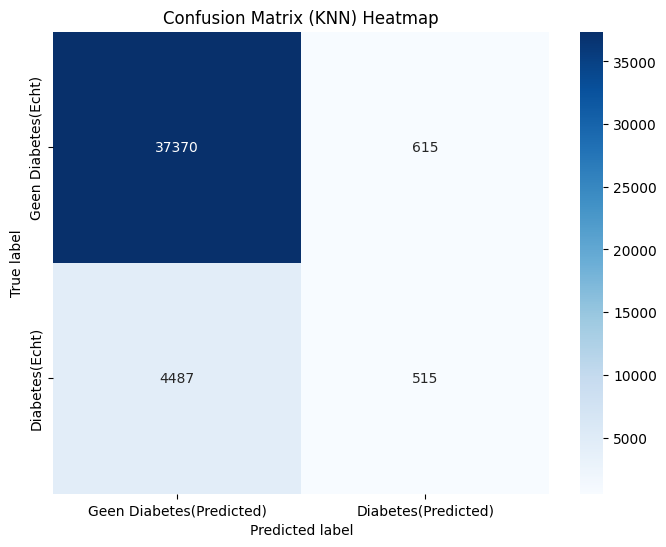

In [32]:
# Maak een heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
heatmap.set_title('Confusion Matrix (KNN) Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Accuracy

Het totaal aantal wat goed voorspelt is.

Accuracy = (TP+TN) / (TP+TN+TP+FN)

In [33]:
from sklearn.metrics import accuracy_score

print("Accuracy=", accuracy_score(y_test, y_test_pred))

Accuracy= 0.8813129550794426


#### Precision

Het aantal voorspelde en werkelijke positieven op het totaal aantal voorspelde postitieven. Precision berekenen:

Precision = TP/(TP + FP)

In [34]:
from sklearn.metrics import precision_score
print("Precision =", precision_score(y_test, y_test_pred, pos_label=2))

Precision = 0.4557522123893805


#### Recall

Het aantal voorspelde en werkelijke positieven op het totaal aantal werkelijke positieven.

Recall = TP/(TP+FN)

In [35]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, y_test_pred, pos_label=2))

Recall = 0.10295881647341064


## Andere modellen

## Logistic Regression

### Data splitten in train en test set

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_def_dum.drop(columns=['Diabetes_012'])
y = df_def_dum['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split de datase, en bewaar het in verschillende variabelen

X_train.head(5)

,BMI,Age,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,...,HvyAlcoholConsump_1,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_0,DiffWalk_1,Sex_0,Sex_1
178452,0.205832,-0.907105,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
150841,0.599892,-0.287912,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
30119,0.008802,0.021684,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
130964,-1.173378,-1.526298,True,False,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
151880,0.599892,-1.216701,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,True,False


### GridSearch CV

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid={'C':np.arange(1,10)}, cv=5,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=1)

In [38]:
# Laat zien de beste "parameters"
print("Best Parameters:", grid_search.best_params_)

# Gebruik de beste "estimator" om resultaten te voorspellen
best_log = grid_search.best_estimator_

Best Parameters: {'C': np.int64(2)}


In [39]:
y_test_pred = best_log.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, y_test_pred) #Creert een "confusion matrix"
conf_matrix2 = pd.DataFrame(conf_matrix, index=['Geen Diabetes(Echt)', 'Diabetes(Echt)'], columns = ['Geen Diabetes(Predicted)', 'Diabetes(Predicted)'])
conf_matrix2

,Geen Diabetes(Predicted),Diabetes(Predicted)
Geen Diabetes(Echt),37370,615
Diabetes(Echt),4487,515


### Logistic regression model evalueren

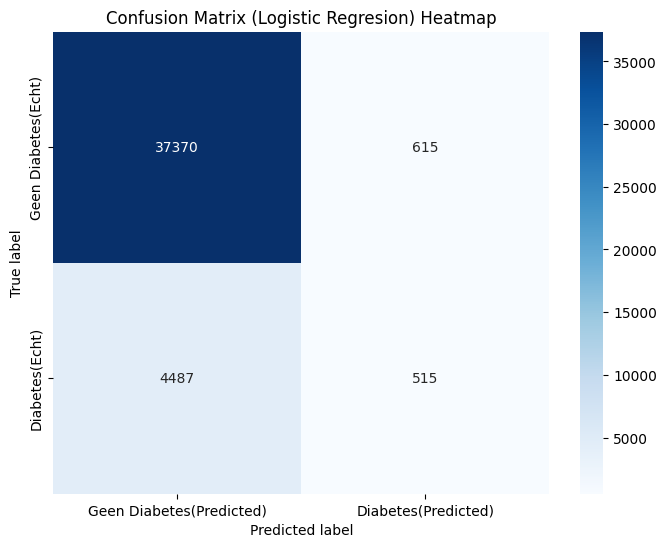

In [40]:
# Maak een heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues")
heatmap.set_title('Confusion Matrix (Logistic Regresion) Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Accuracy

Het totaal aantal wat goed voorspelt is.

Accuracy = (TP+TN) / (TP+TN+TP+FN)

In [41]:
from sklearn.metrics import accuracy_score

print("Accuracy=", accuracy_score(y_test, y_test_pred))

Accuracy= 0.8842673366366576


#### Precision

Het aantal voorspelde en werkelijke positieven op het totaal aantal voorspelde postitieven. Precision berekenen:

Precision = TP/(TP + FP)

In [42]:
from sklearn.metrics import precision_score
print("Precision =", precision_score(y_test, y_test_pred, pos_label=2))

Precision = 0.5139607032057911


#### Recall

Het aantal voorspelde en werkelijke positieven op het totaal aantal werkelijke positieven.

Recall = TP/(TP+FN)

In [43]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, y_test_pred, pos_label=2))

Recall = 0.09936025589764094


## Random Forest

### Data splitten in train en test set

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_def_dum.drop(columns=['Diabetes_012'])
y = df_def_dum['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #split de datase, en bewaar het in verschillende variabelen

X_train.head(5)

,BMI,Age,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,...,HvyAlcoholConsump_1,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,DiffWalk_0,DiffWalk_1,Sex_0,Sex_1
178452,0.205832,-0.907105,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
150841,0.599892,-0.287912,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,True
30119,0.008802,0.021684,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
130964,-1.173378,-1.526298,True,False,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
151880,0.599892,-1.216701,True,False,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,True,False


### GridSearch CV

In [45]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators':np.arange(1,10)}, cv=5,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [46]:
# Laat zien de beste "parameters"
print("Best Parameters:", grid_search.best_params_)

# Gebruik de beste "estimator" om resultaten te voorspellen
best_random = grid_search.best_estimator_

Best Parameters: {'n_estimators': np.int64(6)}


In [47]:
y_test_pred = best_random.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matrix3 = confusion_matrix(y_test, y_test_pred) #Creert een "confusion matrix"
conf_matrix3 = pd.DataFrame(conf_matrix, index=['Geen Diabetes(Echt)', 'Diabetes(Echt)'], columns = ['Geen Diabetes(Predicted)', 'Diabetes(Predicted)'])
conf_matrix3

,Geen Diabetes(Predicted),Diabetes(Predicted)
Geen Diabetes(Echt),37370,615
Diabetes(Echt),4487,515


### Random Forest model evalueren

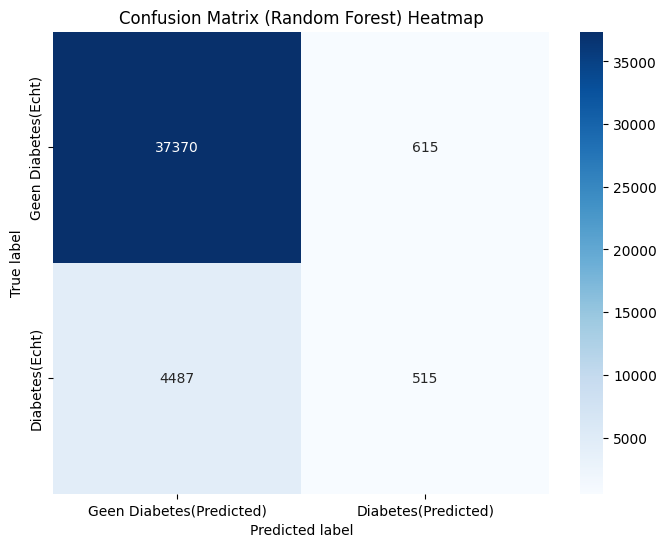

In [48]:
# Maak een heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues")
heatmap.set_title('Confusion Matrix (Random Forest) Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Accuracy

Het totaal aantal wat goed voorspelt is.

Accuracy = (TP+TN) / (TP+TN+TP+FN)

In [49]:
from sklearn.metrics import accuracy_score

print("Accuracy=", accuracy_score(y_test, y_test_pred))

Accuracy= 0.8600972387000722


#### Precision

Het aantal voorspelde en werkelijke positieven op het totaal aantal voorspelde postitieven.

Precision = TP/(TP + FP)

In [50]:
from sklearn.metrics import precision_score
print("Precision =", precision_score(y_test, y_test_pred, pos_label=2))

Precision = 0.3188976377952756


#### Recall

Het aantal voorspelde en werkelijke positieven op het totaal aantal werkelijke positieven.

Recall = TP/(TP+FN)

In [51]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, y_test_pred, pos_label=2))

Recall = 0.17812874850059976


## Evaluatie van verschillende modellen

### KNN Classifier

- Accuracy = 88%
- Precision = 46%
- Recall = 10%

- Accuracy: Accuracy geeft aan welk percentage van de voorspellingen correct is.
Voor onze KNN Classifier model is gelijk aan 88%, wat betekent dat 88% van de voorspellende resultaten correct zijn.

- Precision: De precision meet het percentage van de positieve voorspellingen (mensen met diabetes) dat daadwerkelijk correct is.
Een precision van 46% betekent dat alle mensen die als mensen met diabetes zijn gemarkeerd, slechts 46% daadwerkelijk correct is. Dus 54% van de mensen die als mensen met diabetes zijn gemarkeerd, hebben ze in de werkelijkheid geen diabetes.

- Recall: Recall meet het percentage van de daadwerkelijke positieve exemplaren (mensen met diabetes) dat correct zijn geïdentificeerd door het model. 
Een recall van 10% betekent dat slechts 10% van alle werkelijke positieve gevallen correct is voorspeld door het model. Dus alleen 10% van de mensen met diabetes worden correct geïdentificeerd door het KNN Classifier model.

### Logistic Regression

- Accuracy = 86%
- Precision = 51%
- Recall = 14%

- Accuracy: Accuracy geeft aan welk percentage van de voorspellingen correct is.
Voor onze Logistic Regression model is gelijk aan 86%, wat betekent dat 86% van de voorspellende resultaten correct zijn.

- Precision: De precision meet het percentage van de positieve voorspellingen (mensen met diabetes) dat daadwerkelijk correct is.
Een precision van 29% betekent dat alle mensen die als mensen met diabetes zijn gemarkeerd, slechts 29% daadwerkelijk correct is. Dus 71% van de mensen die als mensen met diabetes zijn gemarkeerd, hebben ze in de werkelijkheid geen diabetes.

- Recall: Recall meet het percentage van de daadwerkelijke positieve exemplaren (mensen met diabetes) dat correct zijn geïdentificeerd door het model. 
Een recall van 14% betekent dat slechts 14% van alle werkelijke positieve gevallen correct is voorspeld door het model. Dus alleen 14% van de mensen met diabetes worden correct geïdentificeerd door het Logistic Regression model.

### Random Forest

- Accuracy = 88%
- Precision = 32%
- Recall = 18%

- Accuracy: Accuracy geeft aan welk percentage van de voorspellingen correct is.
Voor onze Random Forest Classfier model is gelijk aan 88%, wat betekent dat 86% van de voorspellende resultaten correct zijn.

- Precision: De precision meet het percentage van de positieve voorspellingen (mensen met diabetes) dat daadwerkelijk correct is.
Een precision van 52% betekent dat alle mensen die als mensen met diabetes zijn gemarkeerd, slechts 52% daadwerkelijk correct is. Dus 48% van de mensen die als mensen met diabetes zijn gemarkeerd, hebben ze in de werkelijkheid geen diabetes.

- Recall: Recall meet het percentage van de daadwerkelijke positieve exemplaren (mensen met diabetes) dat correct zijn geïdentificeerd door het model. 
Een recall van 10% betekent dat slechts 10% van alle werkelijke positieve gevallen correct is voorspeld door het model. Dus alleen 10% van de mensen met diabetes worden correct geïdentificeerd door het Random Forest model.

## Conclusies

- Alle modellen hebben een goeie accuracy. Dit komt omdat alle modellen een groot aantal van de mensen zonder diabetes kunnen identificeren. Dit zorgt voor een hoge accuracy score.

- De KNN Classifier en de Random Forest modellen hebben ongeveer precision score van 50%. Dit betekent dat deze modellen ongeveer de half van de mensen zonder diabetes worden voorspeld met diabetes. Terwijl de Logistic Regression model een precison score van 29%. Dit betekent dat deze model ongeveer de 70% van de mensen zonder diabetes  voorspeld met diabetes.

- Alle modellen hebben ongeveer recall score van 10%. Dit betekent dat alle modellen slechts 10% van de mensen met diabetes, worden correct geidentificeerd. Dus de modellen kunnen niet goed alle mensen met diabetes identificeren.